# Dataset Exploration

In [149]:
import warnings
warnings.filterwarnings('ignore')

In [150]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df = pd.read_csv("../data/interim/merged_data.csv", index_col=[0])

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191859 entries, 0 to 191858
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Artist  191859 non-null  object
 1   Lyric   191859 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [153]:
df.head()

,Artist,Lyric
0,ivete-sangalo,I feel so unsure\nAs I take your hand and lead...
1,ivete-sangalo,"Don't let them fool, ya\nOr even try to school..."
2,ivete-sangalo,"Baby, let's cruise, away from here\nDon't be c..."
3,ivete-sangalo,"Know it sounds funny\nBut, I just can't stand ..."
4,ivete-sangalo,You've got that look again\nThe one I hoped I ...


In [154]:
df.tail()

,Artist,Lyric
191854,paul-simon,"Hey, Vietnam, Vietnam, Vietnam, Vietnam\nVietn..."
191855,prince,\n\nAll of this and more is for you\nWith love...
191856,r-kelly,"I hear you callin', ""Here I come baby""\nTo sav..."
191857,radiohead,"Come on, come on\nYou think you drive me crazy..."
191858,rihanna,"Ghost in the mirror\nI knew your face once, bu..."


## Handling new line characters
The concensus will be to keep new line characters since they have structural meaning in song lyrics. Hopefuly, the model can learn it. New line characters will have a single blank space before and after them to avoid the model treating them as a part of a word. For example: "on\nYou" should be "on \n You".

The side effect of this will also be replacing multiple whitelines with single whitelines, replacing multiple "\n" with a single one and striping leading and trailing new line characters.

Function to format lyrics.

In [155]:
def format_lyric(lyric):
    # Add leading and trailing whitespace based on newline position.
    lyric = lyric.strip('\n')
    # Replace multiple \n with single \n.
    lyric = re.sub(r'(\n{2,})', '\n', lyric)
    # Wrap the single \n with a single leading and trailing whitespace.
    if '\n' in lyric:
        lyric = lyric.replace("\n", " \n ")

    # Replace multiple whitespaces with a single whitespace.
    lyric = re.sub(" +", " ", lyric)

    return lyric

Apply the formatting function to the "Lyric" column.

In [156]:
df["Lyric"] = df["Lyric"].apply(format_lyric)

In [157]:
df.head()

,Artist,Lyric
0,ivete-sangalo,I feel so unsure \n As I take your hand and le...
1,ivete-sangalo,"Don't let them fool, ya \n Or even try to scho..."
2,ivete-sangalo,"Baby, let's cruise, away from here \n Don't be..."
3,ivete-sangalo,"Know it sounds funny \n But, I just can't stan..."
4,ivete-sangalo,You've got that look again \n The one I hoped ...


In [158]:
df.tail()

,Artist,Lyric
191854,paul-simon,"Hey, Vietnam, Vietnam, Vietnam, Vietnam \n Vie..."
191855,prince,"All of this and more is for you \n With love, ..."
191856,r-kelly,"I hear you callin', ""Here I come baby"" \n To s..."
191857,radiohead,"Come on, come on \n You think you drive me cra..."
191858,rihanna,"Ghost in the mirror \n I knew your face once, ..."


## Number of words

### Merged dataset

In [159]:
df["number_of_words"] = df["Lyric"].apply(lambda x:len(str(x).split()))

In [160]:
df.head()

,Artist,Lyric,number_of_words
0,ivete-sangalo,I feel so unsure \n As I take your hand and le...,299
1,ivete-sangalo,"Don't let them fool, ya \n Or even try to scho...",161
2,ivete-sangalo,"Baby, let's cruise, away from here \n Don't be...",159
3,ivete-sangalo,"Know it sounds funny \n But, I just can't stan...",175
4,ivete-sangalo,You've got that look again \n The one I hoped ...,215


Statistical information.

In [161]:
df["number_of_words"].describe()

count    191859.000000
mean        257.194794
std         596.251168
min           1.000000
25%         147.000000
50%         211.000000
75%         304.000000
max      132909.000000
Name: number_of_words, dtype: float64

Standard deviation is big which is explained by the data sources. The csv file had only one song in one row. The text files contain song lyrics from every song of an artist. We will do a statistical analysis on them separately.

### from_csv.csv dataframe
This dataframe contains a single song in each row.

In [162]:
df_from_csv = pd.read_csv("../data/interim/from_csv.csv", index_col=[0])

In [163]:
df_from_csv["number_of_words"] = df_from_csv["Lyric"].apply(lambda x:len(str(x).split()))

In [164]:
df_from_csv.head()

,ALink,Lyric,number_of_words
0,ivete-sangalo,I feel so unsure\nAs I take your hand and lead...,299
1,ivete-sangalo,"Don't let them fool, ya\nOr even try to school...",161
2,ivete-sangalo,"Baby, let's cruise, away from here\nDon't be c...",159
3,ivete-sangalo,"Know it sounds funny\nBut, I just can't stand ...",175
4,ivete-sangalo,You've got that look again\nThe one I hoped I ...,215


Statistical information.

In [165]:
df_from_csv["number_of_words"].describe()

count    191814.000000
mean        250.229159
std         159.288438
min           1.000000
25%         147.000000
50%         211.000000
75%         304.000000
max        3422.000000
Name: number_of_words, dtype: float64

The outlier with maximum of 3422 words.

In [167]:
print(df_from_csv[df_from_csv["number_of_words"] == 3422]["Lyric"].values[0])

I admit I have made some mistakes
And I have some imperfect ways
I admit I helped so many people
And them same damn people turned fake
I admit it was so hard to focus
I didn't go to classes
I admit that I dropped out of school
I admit that I wasn't that cool
I admit that I just feel like retiring
I admit that I just don't feel like trying
But all my real niggas round me
keep tellin' me "Kells, fuck that you gotta keep climbing"
I admit it, I admit it i did, I done fucked with a couple of fans
I admit that I'm a gift and a curse
I admit that I don't go to church

[Chorus]
I admit it, admit it (I)
I admit it, I did it (I)
I admit it, I did (I)
I admit it, I did, did it

[Verse 2]
I admit it i got so many flaws (yeah)
Told so many lies to these broads (too many lies)
Blew so much money, pop so many bottles
yeah I fucked a bitch just because (just because)
Nigga, i had a hell of a day
but I admit I was in my own way
(hell of a day, in my own way)
I admit I had my mom crying over me
what el

The outlier with a minimum of 1 word. It will be removed since it holds no information.

In [178]:
df_from_csv[df_from_csv["number_of_words"] == 1]["Lyric"]

42588      [Gibberish]
43643     Satisfaction
191731      [Applause]
Name: Lyric, dtype: object

Frequency distribution of number of words without the outlier.

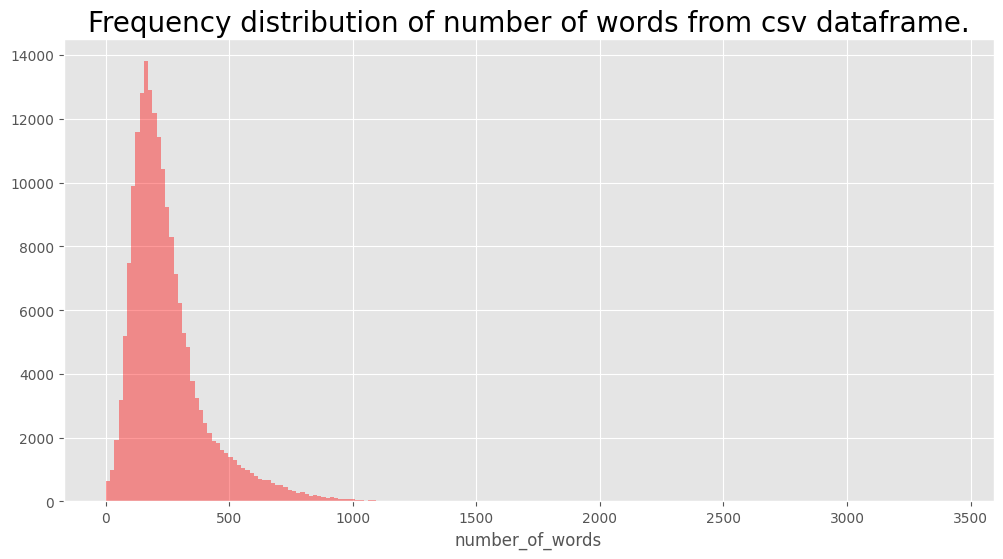

In [168]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(df_from_csv["number_of_words"],kde = False,color="red",bins=200)
plt.title("Frequency distribution of number of words from csv dataframe.", size=20);

Boxplot of number of words.

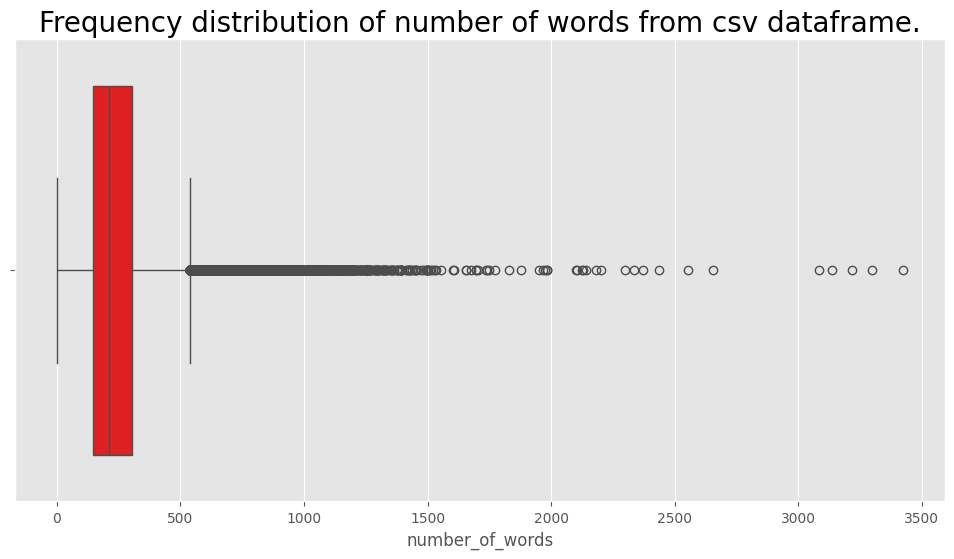

In [169]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))
sns.boxplot(x="number_of_words", data=df_from_csv, color="red")
plt.title("Frequency distribution of number of words from csv dataframe.", size=20);
plt.show();

### from_txt.csv dataframe
This dataframe contains all lyrics of an artist in a single row.

In [170]:
df_from_txt = pd.read_csv("../data/interim/from_txt.csv", index_col=[0])

In [171]:
df_from_txt["number_of_words"] = df_from_txt["Lyric"].apply(lambda x:len(str(x).split()))

In [179]:
df_from_txt.head()

,ALink,Lyric,number_of_words
0,adele,Looking for some education\nMade my way into t...,18978
1,al-green,"Let's stay together I, I'm I'm so in love with...",16637
2,alicia-keys,Ooh....... New York x2 Grew up in a town that ...,23241
3,amy-winehouse,Build your dreams to the stars above\nBut when...,15604
4,beatles,"Yesterday, all my troubles seemed so far away\...",14340


Statistical information.

In [173]:
df_from_txt["number_of_words"].describe()

count        45.000000
mean      29948.444444
std       23189.770213
min        6343.000000
25%       16100.000000
50%       21471.000000
75%       38203.000000
max      132909.000000
Name: number_of_words, dtype: float64

In [180]:
df_from_txt[df_from_txt["number_of_words"] > 38203]

,ALink,Lyric,number_of_words
16,dj-khaled,Another one\nWe The Best music\nDJ Khaled I do...,47870
19,drake,"[Hook]\nI've been down so long, it look like u...",40280
20,eminem,"Look, I was gonna go easy on you and not to hu...",64483
25,kanye-west,﻿Let the suicide doors up\nI threw suicides on...,132909
28,lil-wayne,I bought my first key from my baby momma broth...,47736
31,ludacris,"Aw yeah, yeah\nI mean there's a lot of women o...",47087
32,michael-jackson,\n\n[Spoken Intro:]\nYou ever want something \...,49720
33,missy-elliott,I'mma start it from the bottom\nI'll show you ...,39105
35,nicki-minaj,[:Nicki Minaj]\nYoung money [Verse 1: Jason De...,42483
37,notorious-big,﻿baby It was all a dream\nI used to read Word ...,92619


There are 11 outliers.

The artist which has the most number of words is Kanye West. This is explained by our actions in the dataset modeling step: we combined 3 text files of Kanye's lyrics into one file. 

Frequency distribution of number of words without the outlier.

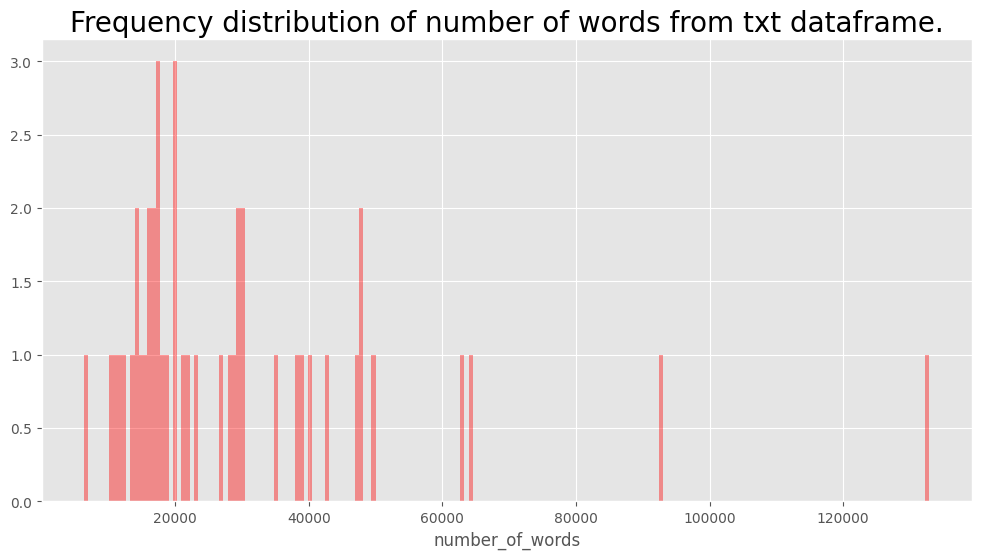

In [181]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(df_from_txt["number_of_words"],kde = False,color="red",bins=200)
plt.title("Frequency distribution of number of words from txt dataframe.", size=20);

Boxplot of number of words.

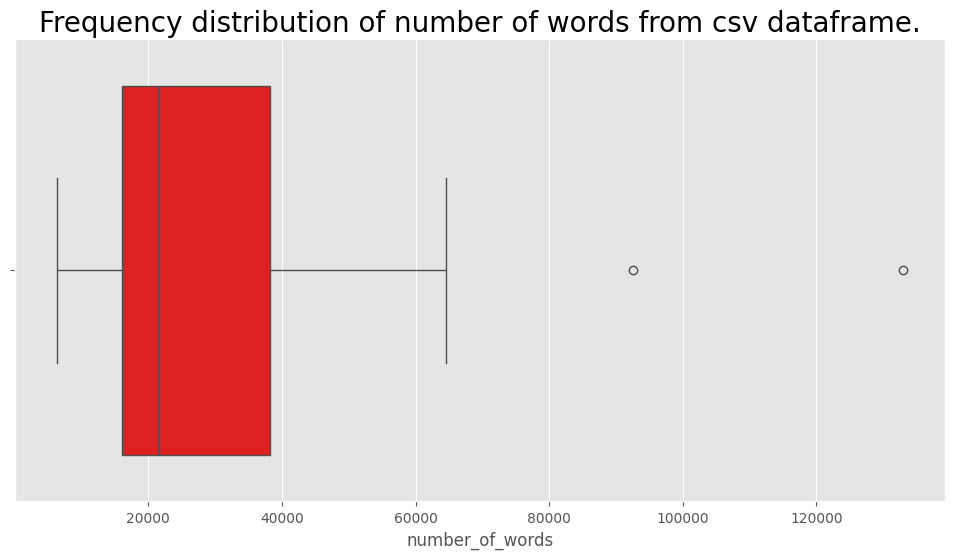

In [183]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))
sns.boxplot(x="number_of_words", data=df_from_txt, color="red")
plt.title("Frequency distribution of number of words from csv dataframe.", size=20);
plt.show();

## Unique simbols and annotations